In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('./data/homeprices_banglore.csv')
# df.head()
df.sample(5)

,area,bedrooms,price
19,800,1,32.0
1,2600,4,120.0
6,2732,4,135.0
7,3300,4,155.0
4,1200,2,51.0


# Batch Gradient Descent

In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))
# scaled_y = sy.fit_transform(df.price)
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [42]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, scaled_X.T) + bias
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, bias, cost, cost_list, epoch_list


w, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),5000)
w, bias, cost
    

(array([0.75542854, 0.41583882]), -0.11684836015389075, 0.0034259177049509168)

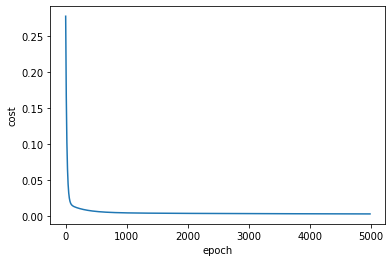

In [43]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)

In [19]:
def predict(area, bedrooms, w, bias):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, bias)

C:\Users\sabir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [20]:
predict(1000, 2, w, bias)

C:\Users\sabir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

# Stochastic Gradient Descent

In [21]:
# instead of picking all the samples, we will now pich samples randomly

In [22]:
import random
random.randint(0,6)

5

In [47]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape= (number_of_features))
    bias = 0
    
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + bias
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        bias_grad = -(2/total_samples)*(sample_y - y_predicted)
        
        w = w - learning_rate * w_grad
        bias = bias - learning_rate * bias_grad
        
        cost = np.square(sample_y - y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, bias, cost, cost_list, epoch_list

w_sgd, bias_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, bias_sgd, cost_sgd

(array([0.70629849, 0.67438118]), -0.22689459560151853, 0.002278867087577138)

In [48]:
w, bias, cost

(array([0.75542854, 0.41583882]), -0.11684836015389075, 0.0034259177049509168)

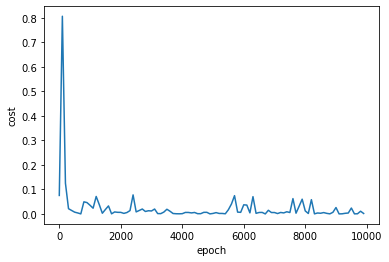

In [49]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd, cost_list_sgd)